<a href="https://colab.research.google.com/github/H5Y0UNG/20_group/blob/main/note_5_(%EA%B9%80%ED%98%B8%EC%98%81%2C_%ED%99%8D%EC%8A%B9%EC%A1%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정리노트

모든 리프의 gini의 값을 0으로 만들기 위해
Decision classifier의 max_depth를 더 늘려봤지만
gini가 0이 아니여도 깊이가 더 늘어나지 않는 리프도 있다.

max_depth가 2이고 길이 5, 넓이 1.5가 입력으로 들어왔을때
versicolor로 예측하지만 max_depth가 2보다 더 늘어나게 되면
virginica로 예측하게 된다.
이유는 gini의 값을 낮추기 위해 과적합되어 잘못 예측한 것으로 보인다.

# 연습문제

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

a. make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성합니다.

먼저 make_moons 데이터 셋을 가져오기 위해
from sklearn.datasets import make_moons 을 실행한다.

In [ ]:
from sklearn.datasets import make_moons

여기서 n_samples는 10000개의 샘플 수를 생성하는 파라미터,
noise는 0~1 사이의 값으로 값이 커질수록 결정 경계가 불분명해지고 데이터가 복잡해진다.

random_state를 42로 고정함으로써 항상 같은 결과를 낸다.

In [ ]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕니다


먼저 train_test_split을 사용하기 위해


In [ ]:
from sklearn.model_selection import train_test_split

훈련 데이터와 테스트 데이터를 8:2로 나눈다.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(GridSearchCV를 사용하면 됩니다). 힌트: 여러 가지 max_leaf_nodes 값을 시도해보세요.


In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV는 파라미터 값을 정해준만큼 자동으로 바꾸며 여러 파라미터의 조합을 통해 모델을 생성하고 최적의 모델을 찾을 수 있다.

먼저 DecisionTreeClassifier를 만든다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=42)

다양한 파라미터의 조합을 위해 많은 파라미터를 생성할 때는
딕셔너리 형태로 파라미터를 생성하는 것이 좋다.

In [ ]:
parameter = {'max_depth': [3, 5, 7],
	'max_leaf_nodes':[None, 5, 10, 20, 30, 50],
	'min_samples_leaf':[1,2,3,4],
              'min_samples_split': [ 2, 3, 5],
             'criterion':["gini","entropy"]}

In [ ]:
grid = GridSearchCV(DTC, parameter, verbose=1, cv=3)

params로 파라미터를 넣고 verbose로 로그를 정보의 양을 정하고 cv는 3으로
세 부분으로 나누어 교차검증을 수행한다.

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [None, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5]},
             verbose=1)

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=50,
                       min_samples_leaf=3, random_state=42)

GridsearchCV를 사용한 결과 criterion이 entropy, max_depth는 7, max_leaf_nodes는 50, min_samples_leaf=3 일 때 최적이라는 결과가 나왔다.

criterion은 자주 사용되는 gini와 entropy 중에서 entropy가 선택 되었고 max_depth, max_leaf_nodes, min_samples_leaf는 과적합을 방지하기 위해 사용한 규제로 gridsearch로 최적의 파라미터 값을 찾았다.

d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8645

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

훈련 데이터와 테스트 데이터를 예측한 결과 시각화

그림 저장: min_samples_leaf_plot


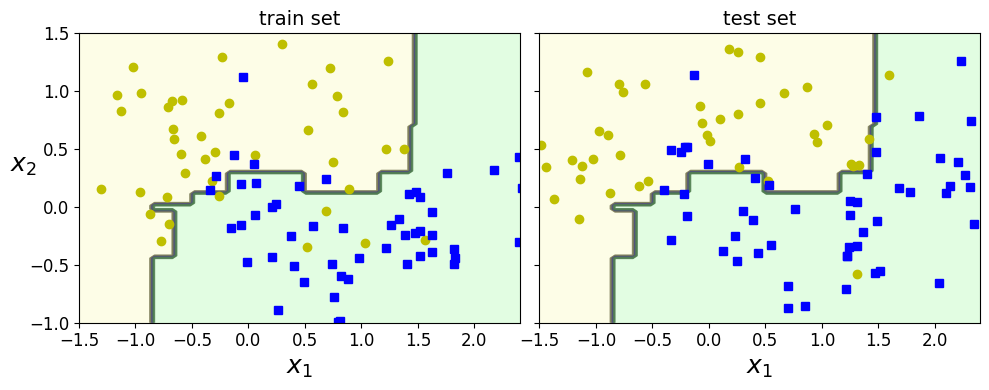

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(grid, X_train[:100], y_train[:100], axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("train set", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(grid, X_test[:100], y_test[:100], axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("test set", fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

결정 경계가 적절하게 나타난 것을 확인할 수 있다.